<a href="https://colab.research.google.com/github/Reynaldev/Rock-Paper-Scissor/blob/main/Rock_Paper_Scissor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Reynaldy Nurcahyo (reynaldy.nur.cahyo.003@gmail.com)

!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip -q rockpaperscissors.zip
!find . -name "__MACOSX" -execdir rm -rf {} ';'
!mkdir rockpaperscissors/train rockpaperscissors/val

In [44]:
import os
import shutil
import random

source_folder = 'rockpaperscissors'
val_folder = 'val'
train_folder = 'train'
categories = ['paper', 'rock', 'scissors']
val_ratio = 0.4

for folder in [val_folder, train_folder]:
    for category in categories:
        os.makedirs(os.path.join(source_folder, folder, category), exist_ok=True)

def split_files(category):
    files = os.listdir(os.path.join(source_folder, category))
    random.shuffle(files)
    split_point = int(len(files) * val_ratio)

    val_files = files[:split_point]
    train_files = files[split_point:]

    for file in val_files:
        shutil.move(os.path.join(source_folder, category, file), os.path.join(source_folder, val_folder, category, file))

    for file in train_files:
        shutil.move(os.path.join(source_folder, category, file), os.path.join(source_folder, train_folder, category, file))

for category in categories:
    split_files(category)

In [70]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size=(128, 128)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=75,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    rescale=1. / 255
)

train_gen = train_datagen.flow_from_directory(
    'rockpaperscissors/train',
    target_size=image_size,
    batch_size=64,
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_directory(
    'rockpaperscissors/val',
    target_size=image_size,
    batch_size=64,
    class_mode='categorical'
)


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [71]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(image_size[0], image_size[1], 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(len(train_gen.class_indices), activation='softmax')
])

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_76 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_76 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_77 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_77 (MaxPooli  (None, 32, 32, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_78 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_78 (MaxPooli  (None, 16, 16, 128)     

In [72]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.optimizers.SGD(learning_rate=0.001, momentum=0.9),
    metrics=['accuracy']
)

In [74]:
model.fit(
    train_gen,
    steps_per_epoch=len(train_gen),
    epochs=15,
    validation_data=val_gen,
    validation_steps=len(val_gen)
)

Epoch 1/15
21/21 [==============================] - 69s 3s/step - loss: 1.0776 - accuracy: 0.4186 - val_loss: 0.9733 - val_accuracy: 0.5378
Epoch 2/15
21/21 [==============================] - 69s 3s/step - loss: 0.9310 - accuracy: 0.5350 - val_loss: 0.8953 - val_accuracy: 0.6007
Epoch 3/15
21/21 [==============================] - 79s 4s/step - loss: 0.9542 - accuracy: 0.5365 - val_loss: 0.8712 - val_accuracy: 0.5755
Epoch 4/15
21/21 [==============================] - 69s 3s/step - loss: 0.8788 - accuracy: 0.5776 - val_loss: 0.8566 - val_accuracy: 0.5549
Epoch 5/15
21/21 [==============================] - 69s 3s/step - loss: 0.8276 - accuracy: 0.5989 - val_loss: 0.8477 - val_accuracy: 0.5492
Epoch 6/15
21/21 [==============================] - 68s 3s/step - loss: 0.7869 - accuracy: 0.6476 - val_loss: 0.8174 - val_accuracy: 0.6156
Epoch 7/15
21/21 [==============================] - 70s 3s/step - loss: 0.7309 - accuracy: 0.7047 - val_loss: 0.7654 - val_accuracy: 0.5835
Epoch 8/15
21/21 [==

In [75]:
loss, acc = model.evaluate(val_gen, steps=len(val_gen))

print("Acc:\t%.3f" % acc)
print("Loss:\t%.3f" % loss)

14/14 [==============================] - 14s 976ms/step - loss: 0.3716 - accuracy: 0.8947
Acc:	0.895
Loss:	0.372


Saving 1398969360000-XXX-ROCKPAPERSCISSORS-APS0170--1857643202.JPG to 1398969360000-XXX-ROCKPAPERSCISSORS-APS0170--1857643202 (2).JPG
1/1 [==============================] - 0s 35ms/step
tf.Tensor([0.5761169  0.21194157 0.21194157], shape=(3,), dtype=float32)


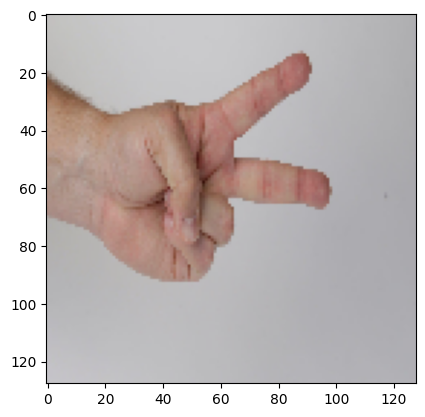

In [85]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  img = image.load_img(fn, target_size=image_size)

  plt.imshow(img)

  img = tf.keras.utils.img_to_array(img)
  img = tf.expand_dims(img, 0)

  predictions = model.predict(img, batch_size=10)

  print(tf.nn.softmax(predictions[0]))